## Project 1: Exploring Weather Trends
The first steps in this project is to download the data using some SQL queries. We do this in the classroom's workspace by typing one query for the global and one for the city's data:
1. ```SQL 
        SELECT * FROM global_data```
2. ```SQL 
        SELECT year, avg_temp, city FROM city_data
        WHERE country = "Greece"
    ```
    
Since we see that there is only one city for Greece, there is no need to develope the second query any further, so we extract those data in two csv files. For reasons of simplicity all the analysis is done in python and presented in a jupyter notebook. A csv file can be read and manipulated in python using the pandas library.

In [6]:
# importing some libraries and setting plot styles
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 22

In [7]:
global_df = pd.read_csv("global_data.csv")
city_df = pd.read_csv("city_data.csv")

First let's plot the data without moving averages to get an intuition of what is going on

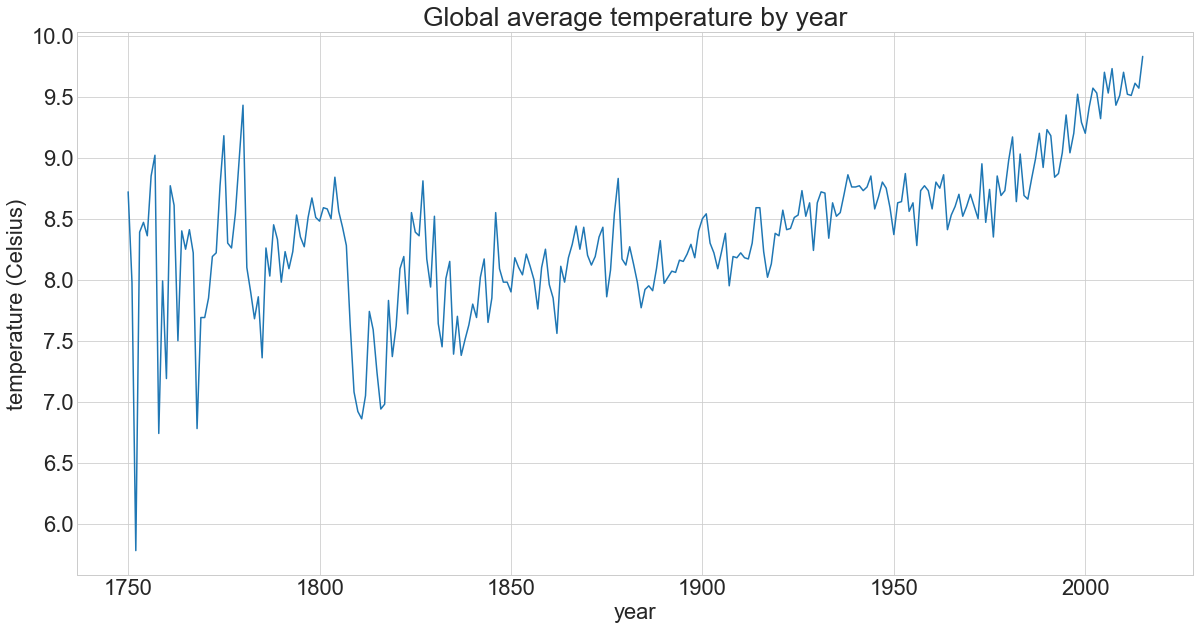

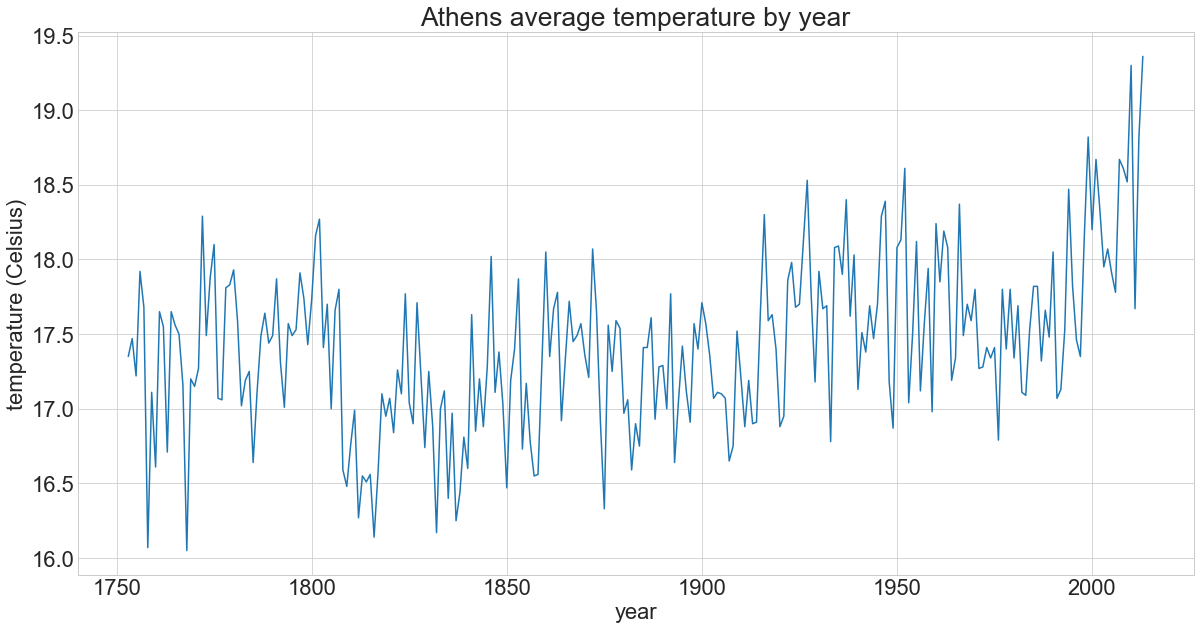

In [8]:
plt.plot(global_df.year, global_df.avg_temp)
plt.title("Global average temperature by year")
plt.xlabel("year")
plt.ylabel("temperature (Celsius)")

plt.show()
plt.close()

plt.plot(city_df.year, city_df.avg_temp)
plt.title("Athens average temperature by year")
plt.xlabel("year")
plt.ylabel("temperature (Celsius)")
plt.show()
plt.close()

We can see that there are some local patterns that seem to repeat approximately every 20 years, so setting a window of 20 would be a good choice. We can perform moving averages in the pandas library using the rolling function.

In [9]:
window = 20
global_temp_ma = global_df.avg_temp.rolling(window).mean()
city_temp_ma = city_df.avg_temp.rolling(window).mean()
print(global_temp_ma)
print(global_temp_ma)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19     8.0060
20     7.9545
21     7.9480
22     8.0685
23     8.0600
24     8.0750
25     8.1160
26     8.0885
27     8.0505
28     8.1405
29     8.1900
        ...  
236    8.7200
237    8.7345
238    8.7685
239    8.7845
240    8.8110
241    8.8400
242    8.8570
243    8.8530
244    8.8815
245    8.9120
246    8.9465
247    8.9640
248    9.0055
249    9.0335
250    9.0445
251    9.0565
252    9.1030
253    9.1280
254    9.1595
255    9.2115
256    9.2465
257    9.2835
258    9.2950
259    9.3245
260    9.3480
261    9.3650
262    9.3985
263    9.4355
264    9.4620
265    9.4860
Name: avg_temp, Length: 266, dtype: float64
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7   

After printing the moving averages we see tha the first 19 values are not a number as expected. Let's plot and discard those first values

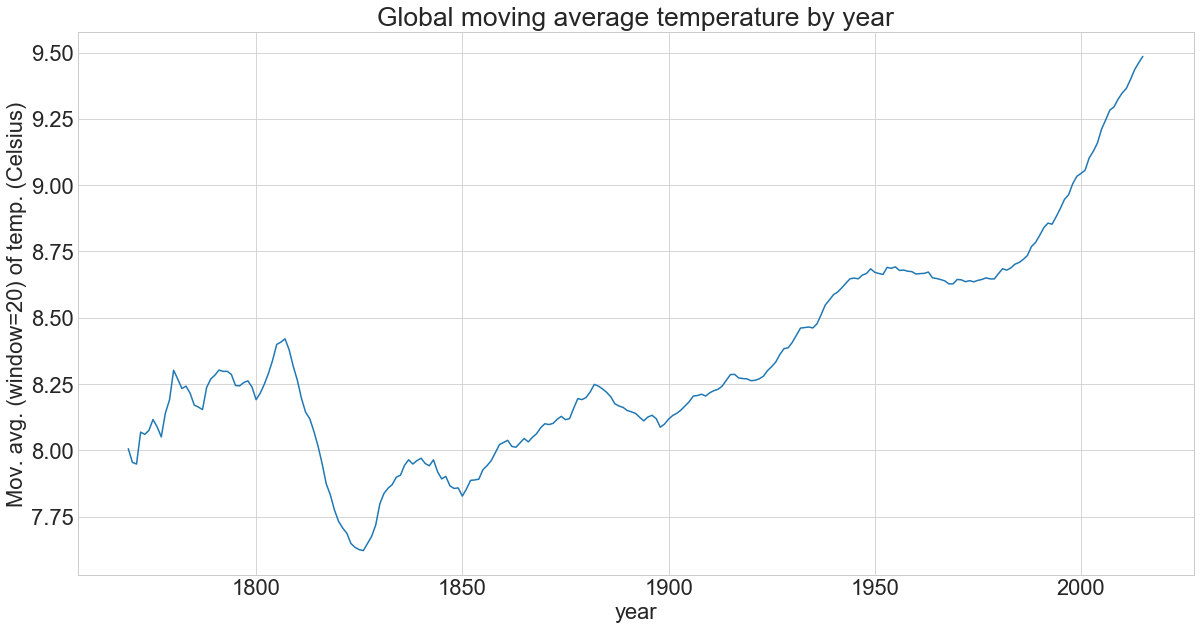

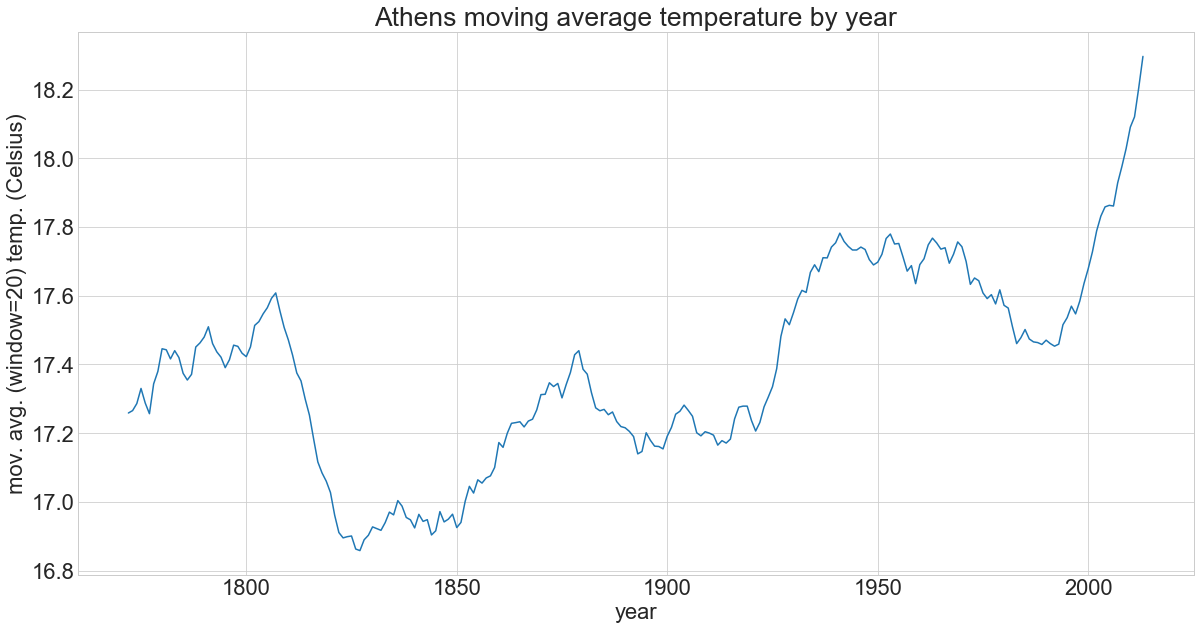

In [10]:
plt.plot(global_df.year[window-1:], global_temp_ma[window-1:])
plt.title("Global moving average temperature by year")
plt.xlabel("year")
plt.ylabel("Mov. avg. (window={}) of temp. (Celsius)".format(window))
plt.show()
plt.close()

plt.plot(city_df.year[window-1:], city_temp_ma[window-1:])
plt.title("Athens moving average temperature by year")
plt.xlabel("year")
plt.ylabel("mov. avg. (window={}) temp. (Celsius)".format(window))
plt.show()
plt.close()

### Observations
1. Both graphs of the global as well as the local temperature, *follow an increasing tendency in the last few years in temperatures that weren't reached in previous years. This is due to climate change*
2. *The two graphs have quite similar patterns* which indicates of course that Athens follows the global climate patterns as expected.
3. After applying the moving average, *the global graph has "flattened better" than the one of Athens*, this indicates that the temperature in Athens has stronger yearly fluctuations than the global temperature, this was also visible in the first graph.
4. *The temperature of Athens is quite larger (almost double) than the global one*. This could be related with two things:
    1. The fact that the city lies within the humid subtropical climate zone.
    2. The fact that Athens is an urban and densely populated city